## Distribution of Scattering Angles in the Laboratory System

In [1]:
import numpy as np
import matplotlib.pyplot as plt

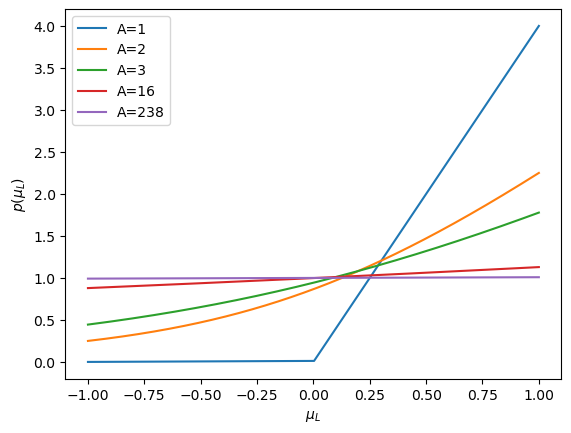

In [2]:
mu_CM = np.linspace(-1, 1, 100000) 
for A in [1.000001, 2, 3, 16, 238]:
    mu_L_vals = (1+A*mu_CM)/np.sqrt(A**2 + 2*A*mu_CM + 1)
    p_mu_L = (A**2 + 2*A*mu_CM+1)**1.5 / (A**2 * (A+mu_CM))
    plt.plot(mu_L_vals, p_mu_L, label="A={:.0f}".format(A))
plt.xlabel("$\mu_L$"); plt.ylabel("$p(\mu_L)$"); plt.legend();

Remember, this is all based on an *isotropic* distribution in the CM system.  Scattering in the LAB system is definitely *not* isotropic for light nuclei, further illustrated by the expected value of the scattering cosine: $\bar{\mu}_L = \frac{2}{3A}$.  For large $A$, $\bar{\mu}_L \approx 0$, but for light nuclei, neutrons tend to keep moving forward.  That impacts the neutron "diffusion" we'll learn about later on!

## A Simulation

In [4]:
E0 = 2e6
En = 1.0
np.log(E0/En)/0.924

15.702010539528375

In [5]:
n = 10000            # number of neutrons to simulate
counts = np.zeros(n) # number of collisions for each neutron

for i in range(n):
    
    E = E0  # initialize my energy to 2 MeV
    while E > En:

        x = np.random.rand() # get a random number between 0 and 1
        if x < 3.8/(3.8+2*20):
            A = 16 # I scatter off of O
        else:
            A = 1  # I scatter off of H
        alpha = (A-1)**2 / (A+1)**2 
        
        # Pick my new energy uniformly from between alpha*E to E
        x = np.random.rand() # get another random number
        E_prime = (E-alpha*E)*x + alpha*E 
        counts[i] += 1 # Increment my collision counter
        E = E_prime    # My outgoing energy becomes my initial energy

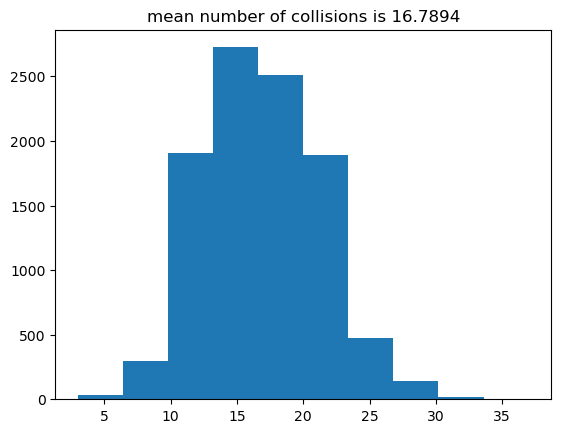

In [6]:
plt.hist(counts)
plt.title("mean number of collisions is {}".format(np.mean(counts)));

**Critical Thinking** We can compute the expected outgoing energy from a single collision (that was $E(1+\alpha)/2$).  Couldn't we go from $E_0$ to $E_0 (1+\alpha)/2$ to $E_0 [(1+\alpha)/2]^2$ all the way down to $E_n = E_0 [(1+\alpha)/2]^n$?  Then wouldn't $n = \frac{\ln (E_n/E_0)}{\ln((1+\alpha)/2))}$?